In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..')
from src.data.etl import *
from src.model.train_model import *
from src.analysis.analysis import *

In [2]:
print(sys.path)

['..', '/home/caw062/template/notebooks', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/home/caw062/.local/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/caw062/.ipython']


# Epidemiology Model 


# Data 
- 1. COVID-19 US cases: Directly read data from JHU github repo.
- 2. Mobility Data provided by Apple for each county in the U.S.


In [3]:
us_confirmed_df,us_death_df,global_recover_df,mobility = retrieve_data()
display(us_confirmed_df.head())
display(us_death_df.head())
display(global_recover_df.head())
display(mobility.head())

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,6143,6172,6203,6228,6248,6264,6270,6303,6313,6324
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,19554,19635,19670,19698,19714,19732,19758,19790,19856,19873
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,2084,2095,2099,2106,2113,2115,2116,2124,2129,2136
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,2432,2437,2442,2445,2449,2450,2450,2454,2459,2461
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,6058,6072,6086,6084,6095,6097,6102,6106,6229,6236


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21
0,84001001,US,USA,840,01001,Autauga,Alabama,US,32.539527,-86.644082,...,84,85,89,90,91,91,91,91,91,92
1,84001003,US,USA,840,01003,Baldwin,Alabama,US,30.727750,-87.722071,...,263,272,274,277,283,283,283,284,285,289
2,84001005,US,USA,840,01005,Barbour,Alabama,US,31.868263,-85.387129,...,50,50,51,51,51,51,51,51,51,51
3,84001007,US,USA,840,01007,Bibb,Alabama,US,32.996421,-87.125115,...,59,59,60,60,60,60,60,60,60,60
4,84001009,US,USA,840,01009,Blount,Alabama,US,33.982109,-86.567906,...,125,125,125,125,127,127,127,127,127,127


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48967,49086,49281,49285,49288,49333,49344,49347,49359,49362
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,65403,66309,67158,68007,68969,69773,70413,71173,72076,72853
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,77382,77537,77683,77842,77976,78098,78234,78377,78524,78672
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10285,10319,10356,10394,10429,10446,10475,10501,10560,10564
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19207,19221,19238,19307,19315,19322,19400,19410,19509,19553


,Country_code,Admin_level,Admin1,Admin2,FIPS,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,...,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21
0,US,1,Alabama,NaN,00001,0.011796,0.018045,0.195074,0.016354,0.181694,...,0.033060,0.019441,0.017221,0.016790,0.021361,0.016755,0.012905,0.016519,0.018261,0.015960
1,US,2,Alabama,Autauga County,01001,0.010175,0.025468,0.258896,0.022481,0.243549,...,0.042638,0.025710,0.021851,0.021084,0.027120,0.015800,0.011539,0.020856,0.021891,0.020568
2,US,2,Alabama,Baldwin County,01003,0.013860,0.020959,0.213163,0.017559,0.205228,...,0.033884,0.019292,0.017355,0.016828,0.021232,0.016327,0.015455,0.017090,0.018070,0.016498
3,US,2,Alabama,Barbour County,01005,0.011820,0.017347,0.170692,0.010406,0.135686,...,0.039875,0.020788,0.015278,0.019309,0.023326,0.018943,0.014178,0.018792,0.018803,0.017192
4,US,2,Alabama,Bibb County,01007,0.018460,0.040510,0.456464,0.037057,0.450207,...,0.062058,0.031951,0.028524,0.032317,0.040851,0.030784,0.020024,0.027738,0.031105,0.028870


In [4]:
df_list = us_confirmed_df,us_death_df,global_recover_df,mobility

In [5]:
# Getting the Susceptible, Infected, Removed, and Population of US from 30 - 70 days into the pandemic
#get_country(30,40,df_list)


# Key variables of Epidemiology Model
- I, the number of infected, is in the `us_comfirmed`
- S, susceptible to COVID-19, is in `us_population` - `us_confirmed`, denoted as `us_susceptible`
- R, removed, is the sum of recovered and deceased. 
- N, population

## Parameters
- Beta: the infection rate
- D: number of days a patient can stay infected

## Goal
- With existing knowledge of I,S,R,and N, use gradient descent to figure out $\theta$ = ($\beta$, D)

# Methods
## Gradient Descent to solve for $\beta$ and $\frac{1}{D}$

Given: 
$\begin{align*}
  &\xi = \frac{1}{D} \\
  &f_s(I_n,N,S_n) = -\beta\left(\frac{I_n}{N}\right) S_n, \\
  &f_I(I_n,N,S_n) = - I\xi + \beta\left(\frac{I_n}{N}\right) S_n,  \\
  &f_R(I_n) = I_n\xi, \\
  &h=1
\end{align*}
$

Plug the above values into
$\frac{1}{N} \sum_{n=1}^N \nabla_{\theta} \left( \left({\frac{s(n+1)-s(n)}{h} - f_s(s(n), I(n), R(n);\theta)}\right)^2
+ \left({\frac{I(n+1)-I(n)}{h} - f_I(s(n), I(n), R(n;\theta)}\right)^2 + \dots \right)$

To calculate the above the term, we need to use __chain rule__ to differentiate with respect to $\beta$ and $\xi$

$\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$



## Tuning
First initialize $\theta$ at $\beta = 0.2 $ and $\xi = 0.1$


Then, at each iteration update $\beta$ and $\xi$ according to the rules below


$\beta_{k+1} = \beta_k - h_G \partial_\beta L(\theta|s(1),\dots,s(N)),$


$
\xi_{k+1} = \xi_k - h_G \partial_\xi L(\theta|s(1),\dots,s(N)).$
 where $h_G = 0.001$
 


 ## Tuning learning rate
 $\nabla_{\beta} = 2 \cdot \left(\frac{S_{n+1} - S_{n}}{h} - \left(-\beta_{k} S_n  \frac{I_n}{N}\right) \right) \cdot \left(S_n \cdot \frac{I_n}{N}\right) + 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  - \left( -\xi_k I_n + \beta_k \frac{I_n}{N} S_n \right)\right) \cdot \left( -S_n \cdot \frac{I_n}{N}\right)$

$\nabla_{\xi} = 2 \cdot \left(\frac{I_{n+1} - I_{n}}{h}  + \left(I_n\xi_k - \beta_k \frac{I_n}{N}S_n\right) \right) \cdot \left(I_n\right) + 2 \cdot \left(\frac{R_{n+1} - R_{n}}{h} - I_n\xi_k\right) \cdot \left( -I_n\right)$


 The Hessian matrix will look like the following:
$ \begin{bmatrix}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &  \frac{\partial \nabla_{\xi}}{\partial_{\beta}}\\
\frac{\partial \nabla_{\beta}}{\partial_{\xi}} & \frac{\partial \nabla_{\xi}}{\partial \xi}
\end{bmatrix}$

We can calculate the hessian matrix given s,i arrays and population 

 $
 \begin{aligned}
 \frac{\partial \nabla_{\beta}}{\partial \beta} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2 + 2\cdot \left(S_{n} \cdot \frac{I_{n}}{N}\right) ^2\right) \\
 &= \frac{1}{N} \sum_{n=1}^N \left(4\cdot \left(S_{n}\cdot \frac{I_{n}}{N}\right)^2\right) 
  \end{aligned}$
 
  $\begin{aligned}
  \frac{\partial \nabla_{\xi}}{\partial \xi} &= \frac{1}{N} \sum_{n=1}^N \left(2\cdot I_{n} ^2 + 2\cdot I_{n} ^2\right) \\
  &= \frac{1}{N} \sum_{n=1}^N  4\cdot I_{n} ^2
  \end{aligned}$
  
   $
 \begin{aligned}
 \frac{\partial \nabla_{\xi}}{\partial_{\beta}} &=  \frac{1}{N} \sum_{n=1}^N -2 \cdot S_{n}\cdot \frac{I_{n}^2}{N} \\
 & = \frac{\partial \nabla_{\beta}}{\partial_{\xi}}
  \end{aligned}$
  
  

  
We then use numpy.lin.eg to get the eigen value of the hessian matrix

In [6]:

s,i,r,p = get_country(30,40,df_list)
learning_rate = tune_learning_rate(s,i,r,p)
print(learning_rate) #Calculate the learning rate from hessian matrix

1.1156462185756376e-11


../src/model/train_model.py:57: RuntimeWarning: overflow encountered in long_scalars
  result_both_second += -2*s[n]*i[n]**2/population


In [7]:
calculate(s,i,r,p,learning_rate,p) #Outputs the Beta, and D

(0.18328635594607004, 101.29711240371584)

0.18328635594607004 101.29711240371584


'us.png'

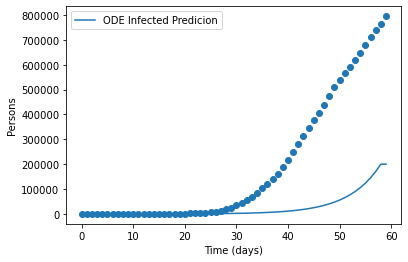

In [8]:
beta,d = calculate(s,i,r,p,learning_rate,p)
s,i,r,p = get_country(30,60,df_list)

print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("us.png",s,i,r,p,beta,d,length,int_steps=1)

0.17522709901040817 399.86971899067424


'california.png'

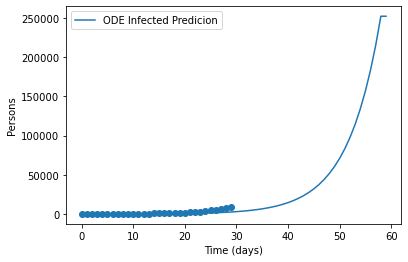

In [33]:
s,i,r,p = get_state(40,30,df_list,"California")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)
print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("california.png",s,i,r,p,beta,d,length,int_steps=1)

In [24]:
for county in california_county_dict.keys():
    s,i,r,p = get_county(40,40,df_list,county)
    learning_rate = tune_learning_rate(s,i,r,p)
    beta,d = calculate(s,i,r,p,learning_rate,p)
    print(county)

06001
06003
06005


KeyboardInterrupt: 

0.0045431843251672295 12548.92719232403


'sd.png'

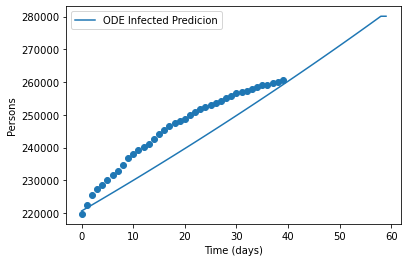

In [34]:
s,i,r,p = get_county(365,40,df_list,"06073")
learning_rate = tune_learning_rate(s,i,r,p)
beta,d = calculate(s,i,r,p,learning_rate,p)
print(beta,d)
length = 60 #predicting 20 more days 
draw_ODE_from_data("sd.png",s,i,r,p,beta,d,length,int_steps=1)

# Use Geographical Information And Mobility Data to Predict County Infection
Each county is never in total isolation from other counties. There is always traffic going in and out of the counties at county borders. So it is necessary to account for the relative mobility, what are the neighboring counties and what are the infection numbers of the neighboring counties to predict infection numbers for each county.

We will use spatial dynamics to predict case numbers for the next day based on the case numbers of the previous day (and of course, geographical information and mobility score)

$\begin{align*}
  \frac{\partial S(x,t)}{\partial t} &= -\beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x S(x,t), \\
  \frac{\partial I(x,t)}{\partial t} &= - \frac{I(x,t)}{D} + \beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x I(x,t),  \\
  \frac{\partial R(x,t)}{\partial t} &= \frac{I(x,t)}{D} + M(x,t) \Delta_x R(x,t).
\end{align*}$

The complete dynamics looks like:
$\begin{multline*}
I(x_1,y_2,t_1) = I(x_1,y_2,t_2) 
- \frac{I(x_1,y_2,t_2)}{D} + \beta\left(\frac{I(x_1,y_2,t_2)}{N}\right) S(x_1,y_2,t_2)  \\
+ M * { I(x_0,y_2,t_2) + I(x_2,y_2,t_2) - 2 I(x_1,y_2,t_2)  + I(x_1,y_1,t_2) + I(x_1,y_3,t_2) - 2 I(x_1,y_2,t_2) }.
\end{multline*}
$
Where M stands for Mobility index (ranging from 0 to 1, and 1 means the most active), I stands for Infection, S stands for Suspected, t_2 stands for the previous day, and t_1 stands for the day we want to predict
$\begin{align}
\frac{\partial I(x,t)}{\partial t} &= - \frac{I(x,t)}{D} + \beta\left(\frac{I(x,t)}{N}\right) S(x,t) + M(x,t) \Delta_x I(x,t)\end{align}$


The gradient would be calculated as $
\nabla_x I(x,t) |_{(x^1, x^2)} \approx
\left( \begin{array}{c}
    \frac{I(x^1,t) - I(x^2,t)}{x^1_1 - x^2_1} 
    \frac{I(x^1,t) - I(x^2,t)}{x^1_2 - x^2_2}
\end{array}
\right)
$

for two neighboring points: $x^1$, $x^2$.
\begin{align}
\Delta_x I(x,t) |_{(x^1, x^2, x^3)} \approx
    \frac{ \partial_{x_1} I(x,t) |_{(x^1, x^2)} - \partial_{x_1} I(x,t) |_{(x^2, x^3)} }{ x^1_1 - x^3_1 } 
    + \frac{ \partial_{x_2} I(x,t) |_{(x^1, x^2)} - \partial_{x_2} I(x,t) |_{(x^2, x^3)} }{ x^1_2 - x^3_2 } \\
    + \frac{ \partial_{x_1} I(x,t) |_{(x^4, x^2)} - \partial_{x_1} I(x,t) |_{(x^2, x^5)} }{ x^4_1 - x^5_1 } 
    + \frac{ \partial_{x_2} I(x,t) |_{(x^4, x^2)} - \partial_{x_2} I(x,t) |_{(x^2, x^5)} }{ x^4_2 - x^5_2 } 
\end{align}
If $x$ is a uniform mesh, then at $x_{(2,2)}$,
\begin{align}
\Delta_x I &= \frac{ (I(x_{(1,2)} ,t ) - I( x_{(2,2)} ,t ) - ( I(x_{2,2},t) - I(x_{(3,2)},t) ) }{\Delta x^2} + \frac{I(x_{(2,1)},t) + I(x_{(2,3)},t) - 2 I(x_{2,2},t) }{\Delta x^2} \\
&= \frac{I(x_{west},t) + I(x_{east},t) - 2 I(x_{center},t) }{\Delta x^2} + \frac{I(x_{south},t) + I(x_{north},t) - 2 I(x_{center},t) }{\Delta x^2}.
\end{align}


$ \Delta x$ can be calulcated as $x_{west,lat} - x_{east,lat}$

# Example: Southern California
We performed a prediction test for southern california. Most counties have error rate less than 25%. 

NameError: name 'nearby_dict' is not defined

In [14]:
import json
with open('nearby.json') as json_file: 
    nearby_dict = json.load(json_file) 
county_list = list(nearby_dict.keys())
def get_california_counties(county_list):
    california = []
    for county in county_list:
        if "".join(county[:2]) == "06":
            california.append(county)
    return california
california_county_list = get_california_counties(county_list)

In [15]:
california_county_dict = {}
for county in nearby_dict.keys():
    if county in california_county_list:
        california_county_dict[county] = nearby_dict[county]

In [16]:

for key in california_county_dict.keys():
    for subkey in california_county_dict[key].keys():
        if list(california_county_dict[key][subkey])[:2]!=["0","6"]:
            #print(ca_county_neighbors[key][subkey])
            california_county_dict[key][subkey] = "border"
            

In [21]:
fips_neighbor_dict = generate_sc_neighbor_dictionary(us_confirmed_df) #TODO: use dictionary of a larger area
fips_neighbor_dict = california_county_dict
d1 = calculate_i_t1("1/21/21",fips_neighbor_dict,us_confirmed_df,.2,14,us_death_df,mobility,n=5)
li = list(d1.keys())
interpret_dictionary_FIP(d1,us_confirmed_df)

06073


{'Alameda, California': 77714.20261697382,
 'Alpine, California': 102.88870879435645,
 'Amador, California': 4419.076719467758,
 'Butte, California': 10776.588187181638,
 'Calaveras, California': 1883.2883141821799,
 'Colusa, California': 2086.4603773344215,
 'Contra Costa, California': 60551.84117819702,
 'Del Norte, California': 990.4005183734425,
 'El Dorado, California': 9738.755457944548,
 'Fresno, California': 93217.1326271322,
 'Glenn, California': 2229.0048586934777,
 'Humboldt, California': 2780.0923531227513,
 'Imperial, California': 626565.7293031778,
 'Inyo, California': 1922.4084982196182,
 'Kern, California': 98361.4319341959,
 'Kings, California': 21816.14318271721,
 'Lake, California': 2978.9104481527306,
 'Lassen, California': 5725.324072997714,
 'Los Angeles, California': 1161697.2617071061,
 'Madera, California': 15179.32122901861,
 'Marin, California': 13671.046129335946,
 'Mariposa, California': 412.17244654059505,
 'Mendocino, California': 3606.8334440493945,
 'Me

In [35]:
fips_neighbor_dict =california_county_dict
#TODO: Take a list of Betas and Ds/ Dictionaries

d1 = calculate_i_t1("2/28/21",fips_neighbor_dict,us_confirmed_df,0.0045431843251672295,12548.92719232403,us_death_df,mobility,n=5)

check_prediction(li,d1,us_confirmed_df,"3/1/21").rename({"Admin2":"county_name","1/22/21":"actual"},axis=1)


#border, lat and long should be the opposite, lat different * 2, long different * 2. 

06073


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,county_name,3/1/21,predicted,percent_difference
195,Alameda,80777,80744,-0.000400
196,Alpine,82,101,0.237148
197,Amador,3466,5257,0.517010
198,Butte,10970,11003,0.003056
199,Calaveras,1910,2018,0.056608
200,Colusa,2136,2155,0.009083
201,Contra Costa,62720,62511,-0.003325
202,Del Norte,1003,1002,-0.000361
203,El Dorado,9160,10253,0.119407
204,Fresno,95548,95699,0.001587


In [36]:
d1

{'06001': 80744.72345324533,
 '06003': 101.44609677335139,
 '06005': 5257.956946128775,
 '06007': 11003.52450569063,
 '06009': 2018.1213306221618,
 '06011': 2155.4009046894334,
 '06013': 62511.471307254214,
 '06015': 1002.6380773486565,
 '06017': 10253.7680566461,
 '06019': 95699.6573999582,
 '06021': 2262.842918943932,
 '06023': 3193.6120729385398,
 '06025': 5455143.917089092,
 '06027': 2904.339442962371,
 '06029': 103763.22979451153,
 '06031': 22070.72921064798,
 '06033': 3168.640478286294,
 '06035': 5621.750919743241,
 '06037': 1194176.6028137014,
 '06039': 15551.89577975427,
 '06041': 13933.025875102954,
 '06043': 504.9154172193249,
 '06045': 3801.7431338201077,
 '06047': 29114.88465144915,
 '06049': 468.1020637043504,
 '06051': 1628.6156904931343,
 '06053': 42317.38566756378,
 '06055': 9180.195270818176,
 '06057': 9017.011751077704,
 '06059': 391783.16226602806,
 '06061': 19900.33273088389,
 '06063': 997.382911244334,
 '06065': 254112.65523501075,
 '06067': 93576.37783939982,
 '06

In [ ]:
def calculate_delta_initialization(dic,county_name,us_confirmed_df,t2_date): 
    '''
    dic: the dictionary containing neighboring county FIPs
    county_name: the FIP of the county of interest
    us_confirmed: dictionary containing infected case numbers for us to initialize our dictionary
    t2_date: the previous day (our prediction is based on), so we can look up the infection stats from the confirmed df
    '''
    
    infected_dic = {}
    
    center_infected = us_confirmed_df.loc[us_confirmed_df.FIPS == county_name][t2_date].values[0]
    infected_dic["center"] = center_infected
    north_county = dic[county_name]["north"]
    south_county = dic[county_name]["south"]
    
    
    a = np.array(list(dic[county_name].values()))
    li = ["north","south","west","east"]
    if np.count_nonzero(a == "border") == 3:
        
        for side in li:
            if dic[county_name][side]!="border":
                only_neighbor_county = dic[county_name][side]
                infected_dic[side] = us_confirmed_df.loc[us_confirmed_df.FIPS == only_neighbor_county][t2_date].values[0]
                li.remove(side)
                for k in li:
                    infected_dic[k] = center_infected
                    lat_difference = calculate_lat_long_difference(county_name,only_neighbor_county,us_confirmed_df)[0] * 2
                    long_difference = calculate_lat_long_difference(county_name,only_neighbor_county,us_confirmed_df)[1] * 2
        first_term = (infected_dic["west"] + infected_dic["east"] - 2 * center_infected)/lat_difference ** 2
        second_term =  (infected_dic["north"] + infected_dic["south"] - 2 * center_infected)/lat_difference ** 2
        
        return first_term+second_term
    if (north_county == "border") & (south_county!="border"):
        infected_dic["south"] = us_confirmed_df.loc[us_confirmed_df.FIPS == south_county][t2_date].values[0]
        infected_dic["north"] = center_infected
        long_difference = calculate_lat_long_difference(county_name,south_county,us_confirmed_df)[1] * 2 #times two, mirror the lat and long of opposite
    elif (north_county != "border") & (south_county =="border"):
        infected_dic["south"] = us_confirmed_df.loc[us_confirmed_df.FIPS == north_county][t2_date].values[0]
        infected_dic["north"] = center_infected
        long_difference = calculate_lat_long_difference(north_county,county_name,us_confirmed_df)[1] * 2 #times two, mirror the lat and long of opposite
    elif (north_county != "border") & (south_county !="border"):
        infected_dic["south"] = us_confirmed_df.loc[us_confirmed_df.FIPS == south_county][t2_date].values[0]
        infected_dic["north"] = us_confirmed_df.loc[us_confirmed_df.FIPS == north_county][t2_date].values[0]
        long_difference = calculate_lat_long_difference(north_county,south_county,us_confirmed_df)[1] #times two, mirror the lat and long of opposite
        
        
    west_county = dic[county_name]["west"]
    east_county = dic[county_name]["east"]
    
    
    if (west_county == "border") & (east_county!="border"):
        infected_dic["east"] = us_confirmed_df.loc[us_confirmed_df.FIPS == east_county][t2_date].values[0]
        infected_dic["west"] = center_infected
        lat_difference = calculate_lat_long_difference(county_name,east_county,us_confirmed_df)[0] * 2 #times two, mirror the lat and long of opposite
    elif (west_county != "border") & (east_county =="border"):
        infected_dic["west"] = us_confirmed_df.loc[us_confirmed_df.FIPS == west_county][t2_date].values[0]
        infected_dic["east"] = center_infected
        lat_difference = calculate_lat_long_difference(county_name,west_county,us_confirmed_df)[0] * 2 #times two, mirror the lat and long of opposite
    elif (west_county != "border") & (east_county !="border"):
        infected_dic["west"] = us_confirmed_df.loc[us_confirmed_df.FIPS == west_county][t2_date].values[0]
        infected_dic["east"] = us_confirmed_df.loc[us_confirmed_df.FIPS == east_county][t2_date].values[0]
        lat_difference = calculate_lat_long_difference(west_county,east_county,us_confirmed_df)[0] * 2 #times two, mirror the lat and long of opposite
    
    #if at this point, north is still border, means that both north and south didn't have neighbors
    if "north" not in infected_dic.keys():
        print(county_name)
        return (infected_dic["west"] + infected_dic["east"] - 2 * center_infected)/lat_difference ** 2
    if "west" not in infected_dic.keys():
        return (infected_dic["north"] + infected_dic["south"] - 2 * center_infected)/lat_difference ** 2
    
    first_term = (infected_dic["west"] + infected_dic["east"] - 2 * center_infected)/lat_difference ** 2
    second_term =  (infected_dic["north"] + infected_dic["south"] - 2 * center_infected)/lat_difference ** 2
    return first_term+second_term
def calculate_lat_long_difference(county_FIP1,county_FIP2,us_confirmed_df):
    '''
    returns a tuple, where the first entry is the difference in lat
    the second entry is the difference in long
    '''
    lat_1 = us_confirmed_df.loc[us_confirmed_df.FIPS == county_FIP1]["Lat"].values[0]
    long_1 = us_confirmed_df.loc[us_confirmed_df.FIPS == county_FIP1]["Long_"].values[0]
    lat_2 = us_confirmed_df.loc[us_confirmed_df.FIPS == county_FIP2]["Lat"].values[0]
    long_2 = us_confirmed_df.loc[us_confirmed_df.FIPS == county_FIP2]["Long_"].values[0]
    return lat_1-lat_2,long_1-long_2   

In [229]:
def calculate_i_t1(t2_date,dic,us_confirmed_df,beta,d,us_death_df,us_mobility_df,n=10):
    '''
    t2_date: date of the previous day
    dic: dictionary containing each county's four neighboring counties. e.g. dic["San Diego"]["east"] = "Imperial"
    beta: 0.2
    d: 14
    '''
    dic_predictions = {}
    mobility_dic = {}
    population_dic = {}

    dt = 1.0/n
    
    #initialization, initialize the dictionary, the values will be the infected cases in t2
    for county_name in dic.keys():
        infected_t2 =  us_confirmed_df.loc[us_confirmed_df.FIPS == county_name][t2_date].values[0]
        try:
            m_t2 = us_mobility_df.loc[us_mobility_df.FIPS == county_name][t2_date].values[0]
        except:
            m_t2 = us_mobility_df[t2_date].mean()
        mobility_dic[county_name] = m_t2
        
        #death_t2 = us_death_df.loc[us_death_df.FIPS == county_name][t2_date].values[0]
        population = find_population_for_county(county_name,us_death_df)
        population_dic[county_name] = population
        s_t2 = population - infected_t2
        
        first_term = infected_t2 #previous day number, infected number at t0
        
    
        second_term = -infected_t2/d
        third_term = beta * (infected_t2/population) * s_t2
        fourth_term = calculate_delta_initialization(dic,county_name,us_confirmed_df,t2_date) * m_t2
        
        
            
        dic_predictions[county_name] = sum([first_term,sum([second_term,third_term,fourth_term])*dt])
    for i in range(n-1):
        def calculate_for_dt(dic_predictions,population_dict,mobility_dict,d,beta):
            for county_name in dic_predictions.keys():
                infected_prev = dic_predictions[county_name]
                m = mobility_dict[county_name]
                population = population_dict[county_name]
                s = population - infected_prev
                first_term = infected_prev #t(n-1) infected number of the previous t
                second_term = -infected_prev/d
                third_term = beta * (infected_prev/population) * s
                fourth_term = calculate_i_delta(dic_predictions,dic,county_name,us_confirmed_df) * m
                fourth_term = 0
                dic_predictions[county_name] = sum([first_term,sum([second_term,third_term,fourth_term])*dt])
            return dic_predictions
        dic_predictions = calculate_for_dt(dic_predictions,population_dic,mobility_dic,d,beta)
        #calculate_for_dt, run for n-1 times
        
    
    
    
    return dic_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value 

,county_name,actual,predicted,percent_difference
195,Alameda,69554,69324,-0.003299
196,Alpine,73,92,0.272470
197,Amador,3038,4005,0.318366
198,Butte,9643,9617,-0.002602
199,Calaveras,1647,1679,0.019507
200,Colusa,1854,1878,0.013227
201,Contra Costa,54140,54074,-0.001215
202,Del Norte,870,881,0.013778
203,El Dorado,8002,8709,0.088362
204,Fresno,84137,83857,-0.003318


<img src="https://i.pinimg.com/originals/16/57/c3/1657c35c5e8c8e87289f00b4869c2889.png">

# Training Spatial Model

We would want to minimize the loss function, by setting the derivative of the loss function to zero and solve the function to find the $\beta$, D and c to minimize the loss function. $\begin{align*}
L(I(\cdot,t+1) | I(\cdot,t); \beta, D, c)
= \sum_{\mathbf{v} = (x_1, y_1)}^{(x_N, y_N)} 
({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }^2.
\end{align*}$

Total Loss Function
$\mathcal{L} = \sum_{t=1}^{T-1} L(I(\cdot,t+1) | I(\cdot,t); \beta, D, c)$

# plan of code:
## with respect to $\xi = \frac{1}{D}$ the derivative equals:
for each day:
for each county:
loss_derivative+= $({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot-I(v,t)$
        
## with respect to beta
for each day:
for each county:

if county != county_name: conitnue

county_beta_dict[county] +=$({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot\frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t)$

## with respect to c
for each day:
for each county:
loss_derivative+= $({ I(\mathbf{v},t+1) - ({ I(\mathbf{v},t) - \frac{I(\mathbf{v},t)}{D} + \beta(\mathbf{v}) \frac{I(\mathbf{v},t)}{N} S(\mathbf{v},t) + c \cdot M(\mathbf{v}) \cdot \Delta_{\mathbf{v}} I(\mathbf{v},t))) } }\cdot M(\mathbf{v}) \cdot\Delta_{\mathbf{v}} I(\mathbf{v},t)^2$

In [15]:
us_confirmed_df = us_confirmed_df.dropna(subset = ["FIPS"])
date_cols = []
for col in us_confirmed_df.columns:
    if col[-2:] in ["21","20"]:
        date_cols.append(col)
        
col_heads = ["FIPS"]
col_heads.extend(date_cols)
fips_dates_only = us_confirmed_df[col_heads].set_index("FIPS")
infected_dict = {}
for row in fips_dates_only.index:
    row_dict = fips_dates_only.loc[row].to_dict()
    infected_dict[row] = row_dict

In [18]:
us_death_df = us_death_df.dropna(subset=["FIPS"])
suspected_df = us_confirmed_df[date_cols]

for date in date_cols:
    suspected_df[date] = us_death_df.Population - us_confirmed_df[date]
suspected_df["FIPS"] = us_confirmed_df.FIPS
suspected_dict = {}
for row in suspected_df.index:
    row_dict = suspected_df.loc[row].to_dict()
    suspected_dict[row] = row_dict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
def convert_cases_to_dictionary(us_confirmed_df,county_of_interest="all"):
    
    us_confirmed_df = us_confirmed_df.dropna(subset = ["FIPS"])
    date_cols = ["FIPS"]
    for col in us_confirmed_df.columns:
        if col[-2:] in ["21","20"]:
            date_cols.append(col)
    fips_dates_only = us_confirmed_df[date_cols].set_index("FIPS")
    infected_dict = {}
    if county_of_interest != "all":
        return fips_dates_only.loc[county_of_interest].to_dict()
    for row in fips_dates_only.index:
        row_dict = fips_dates_only.loc[row].to_dict()
        infected_dict[row] = row_dict
    return infected_dict

In [ ]:
#1, something wrong with border treatment, put the opposite county's coordinates in the place of border
#2. 
def calculate_gradients():
    beta_gradient_dict = {} #initialize with all zeros
    for day in range(length):
        date = convert_day(day,d_0)
        
        for county in counties:
            epsilon_gradient += (infected_dict[day+1][county]  - (infected[day][county]  - (infected[day] / D) 
               + initialized_beta[county] * infected[day][county]  * suspected

In [14]:
#1, something wrong with border treatment, put the opposite county's coordinates in the place of border
#2. 
def calculate_gradients():
    beta_gradient_dict = {} #initialize with all zeros
    for day in range(length):
        date = convert_day(day,d_0)
        
        for county in counties:
            epsilon_gradient += (infected_dict[day+1][county]  - (infected[day][county]  - (infected[day] / D) 
               + initialized_beta[county] * infected[day][county]  * suspected_dict[day][county]/population_dict[county]
               + c * mobility[county] * calculate_i_delta(county,date)))
                             * suspected[day][county] * infected[day][county]/poulation_dict[county]
            
                             
            beta_gradient_dict += 
            # c_gradient += 
    return epsilon_gradient,beta_gradient,c_gradient


IndentationError: unexpected indent (<ipython-input-14-2b7c0c7344e1>, line 12)

In [17]:
n_days = 60
d_0 = "2/1/2020"
infected 
suspected
mobility

def minimize_loss(learning_rate,n_iterations,n_days,d_0):
    epsilon = 
    beta_dict = {}  
    c = float
    
    epsilons = []
    betas = []
    cs = []
    for iterations in range(n_iterations):
        epsilon_gradient,beta_gradient,c_gradient = calculate_gradients(epsilon,beta,c)
        epsilon_new  = epsilon + learning_rate * epsilon_gradient / (n_days * n_counties)
        beta_new  = beta + learning_rate * beta_gradient / (n_days * n_counties)
        c_new = c + learning_rate * c_gradient / (n_days * n_counties)
        if all([epsilon_new == epsilon,beta_new == beta,c_new == c]):
            print("Success")
            return epsilons,betas,cs
        else:
            epsilon = epsilon_new
            beta = beta_new
            c_new = c
            epsilons.append(epsilon)
            betas.append(beta)
            cs.append(cs)
    return epsilons,betas,cs
        

SyntaxError: invalid syntax (<ipython-input-17-8092c9057431>, line 8)

# Result & Discussion
From the map above, we can see that the counties we have really "inaccurate" predictions are San Luis Obispo, Imperial and San Diego counties, which are all in the corners of all the counties we took into consideration. The missing data for neighboring counties for the counties on edges/corners can explain away some of the inaccuracy in predictions for these counties. 


In [62]:
from collections import defaultdict
import geopandas as gpd
import numpy as np
def generate_df(nbr):  
    fips = list(nbr.FIPS)
    for i in range(len(fips)):
        if not fips[i]>0:
            fips[i]=fips[i-1]
    nbr['FIPS']=fips
    idx = []
    for i in range(nbr.shape[0]):
        center = nbr.loc[i,'FIPS'] 
        nearby = nbr.loc[i,'N-FIPS']
        if center == nearby:
            idx.append(i)
    nbr = nbr.drop(idx)
    nbr=nbr.reset_index(drop=True)
    nbr["FIPS"] = nbr["FIPS"].apply(lambda x:str(int(x)).zfill(5))
    nbr["NeighborFIPS"] = nbr["N-FIPS"].apply(lambda x:str(int(x)).zfill(5))
    
    return nbr[["FIPS","NeighborFIPS"]]
def get_neighbors(code,nbr):
    dic = {}
    keys = nbr.FIPS
    values=nbr['NeighborFIPS']
    res = defaultdict(list)
    for i, j in zip(keys, values): 
        res[i].append(j)
    return res[code]

/home/caw062/.local/lib/python3.7/site-packages/geopandas/_compat.py:87: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [63]:
df = pd.read_csv('https://www2.census.gov/geo/docs/reference/county_adjacency.txt', sep= '\t',encoding= 'unicode_escape', names =['Center','FIPS','NBR','N-FIPS'])
neighbor_df= generate_df(df)[['FIPS','NeighborFIPS']]
neighbor_dict = neighbor_df.groupby("FIPS")["NeighborFIPS"].apply(list).to_dict()
fp = "../data/gis/info.shp"
fips_coordinates = gpd.read_file(fp)[["FIPS","LAT","LON"]]


In [64]:
coordinate_dict = fips_coordinates.set_index("FIPS").T.to_dict()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  """Entry point for launching an IPython kernel.


In [65]:
print(coordinate_dict["01001"])
print(coordinate_dict[neighbor_dict["01001"][0]])

{'LAT': 32.5349, 'LON': -86.6428}
{'LAT': 32.8479, 'LON': -86.7188}


In [66]:
i=0
center = "01001"
center_lat = coordinate_dict[center]["LAT"]
center_long = coordinate_dict[center]["LON"]
coordinate_dict[center]["LAT"]
coordinate_dict[neighbor_dict[center][i]]["LAT"]
coordinate_dict[neighbor_dict[center][i]]["LON"]

-86.7188

In [204]:
import math
def calculate_lat_long_difference(fip1,fip2):
    fip1_lat = coordinate_dict[fip1]["LAT"]
    fip1_lon = coordinate_dict[fip1]["LON"]
    fip2_lat = coordinate_dict[fip2]["LAT"]
    fip2_lon = coordinate_dict[fip2]["LON"]
    
    return  fip1_lon - fip2_lon,fip1_lat - fip2_lat
def calculate_degrees(fip1,fip2):
    vector_1 = list(calculate_lat_long_difference(fip1,fip2))
    vector_2 = [1, 0]
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    return angle*180/math.pi
center = "06073"



neighbors_of_center_county = neighbor_dict[center]
count_of_neighbors = len(neighbors_of_center_county)
degrees = []


def get_neighbor_4_directions_dict(center_county_fip,neighbor_dict):
    neighbors_of_center_county = neighbor_dict[center_county_fip]
    count_of_neighbors = len(neighbors_of_center_county)
    degrees = []
    neighbhor_direction = dict(zip(["north","south","west","east"],["border"]*4))

    for neighbor in range(count_of_neighbors):
        neighbor_fip = neighbor_dict[center_county_fip][neighbor]
        degree = calculate_degrees(neighbor_dict[center_county_fip][neighbor],center)
        if (degree < 135 and degree >= 45):
            neighbhor_direction["north"] = neighbor_fip

        elif (degree < 315) and (degree >= 225):
            neighbhor_direction["south"] = neighbor_fip
        elif (degree < 225 ) and (degree >= 135):
            neighbhor_direction["west"] = neighbor_fip
        elif (degree <45 ) or (degree >= 315): #including lower bound, don't include upper bound
            neighbhor_direction["east"] = neighbor_fip

    return neighbhor_direction
# TODO zero division error
get_neighbor_4_directions_dict("06059",neighbor_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


{'north': '06071', 'south': 'border', 'west': '06037', 'east': '06065'}

In [206]:
ca_county_neighbors["06015"]

{'north': '41033', 'south': 'border', 'west': 'border', 'east': 'border'}

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
